# Random Networks

Будем рассматривать случайные графы Эрдёша-Реньи.

In [1]:
import networkx as nx
from math import factorial, e
from collections import Counter
from operator import add
from functools import reduce
from rnets import gen_random_graph_with_degree_dist

import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

def get_node_degree_theoretical_dist(N, max_deg):
    return [N * 1.0 / (factorial(k) * e) for k in range(max_deg + 1)]


def review_with_aggregation(N, p, nsamples):
    if nsamples == 1:
        G, counter = gen_random_graph_with_degree_dist(N, p)
    else:
        counter = reduce(add, map(lambda _: gen_random_graph_with_degree_dist(N, p)[1], range(nsamples)))
    deg, count = zip(*sorted(counter.items()))
    count = [float(x) / nsamples for x in count]
    th_count = get_node_degree_theoretical_dist(N, max(deg))
    print(f"Degree distribution: {list(zip(deg, count))}")

    fig, ax = plt.subplots(figsize=(12, 7))
    plt.bar(deg, count, width=0.8, color='orange', label="generated", alpha=0.5)
    plt.bar(range(max(deg) + 1), th_count, width=0.8, color='blue', label='theoretical', alpha=0.5)

    plt.title(f"Degree histogram for aggregated {nsamples=}")
    plt.xlabel('degree')
    plt.ylabel('count')
    plt.legend()
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    if nsamples == 1:
        plt.axes([0.5, 0.5, 0.4, 0.4])
        Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
        pos = nx.spring_layout(G)
        plt.axis("off")
        nx.draw_networkx_nodes(G, pos, node_size=10, node_color='red')
        nx.draw_networkx_edges(G, pos, alpha=0.4)


### $k = 1$

In [2]:
N = 101
k = 1
p = k * 1. / (N - 1)

Degree distribution: [(0, 39.0), (1, 37.0), (2, 21.0), (3, 3.0), (4, 1.0)]


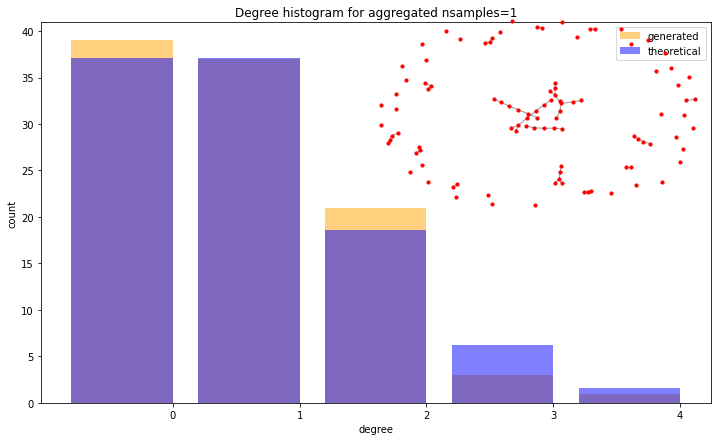

In [3]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 36.91), (1, 37.18), (2, 18.85), (3, 6.36), (4, 1.32), (5, 0.3), (6, 0.06), (7, 0.02)]


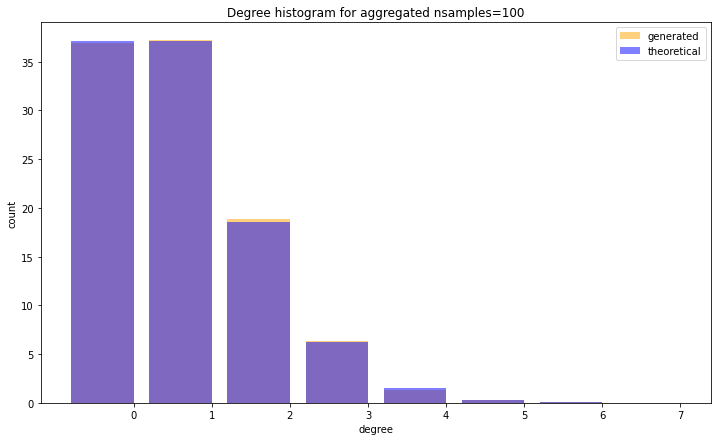

In [4]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 36.82), (1, 37.452), (2, 18.693), (3, 6.176), (4, 1.54), (5, 0.27), (6, 0.046), (7, 0.002), (8, 0.001)]


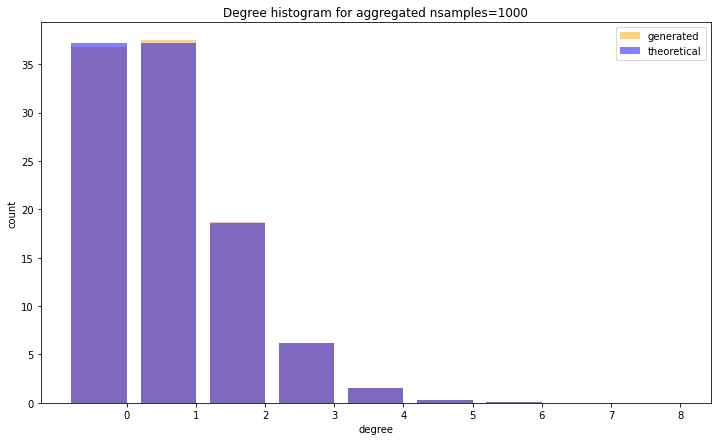

In [5]:
review_with_aggregation(N, p, 1000)


### $k = 2$

In [6]:
N = 101
k = 2
p = k * 1. / (N - 1)

Degree distribution: [(0, 17.0), (1, 19.0), (2, 33.0), (3, 14.0), (4, 8.0), (5, 6.0), (6, 3.0), (7, 1.0)]


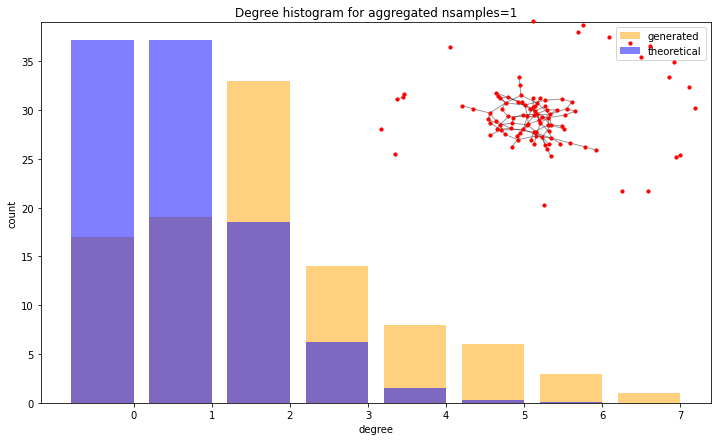

In [7]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 13.12), (1, 27.33), (2, 27.88), (3, 18.54), (4, 8.99), (5, 3.61), (6, 1.19), (7, 0.27), (8, 0.06), (11, 0.01)]


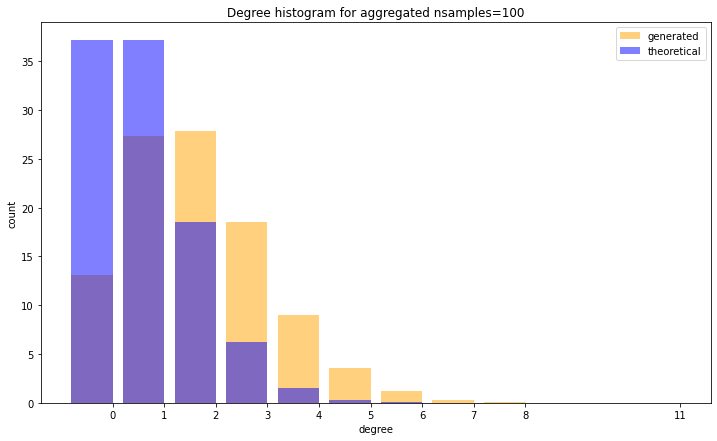

In [8]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 13.569), (1, 27.188), (2, 27.593), (3, 18.316), (4, 9.156), (5, 3.653), (6, 1.119), (7, 0.311), (8, 0.074), (9, 0.018), (10, 0.003)]


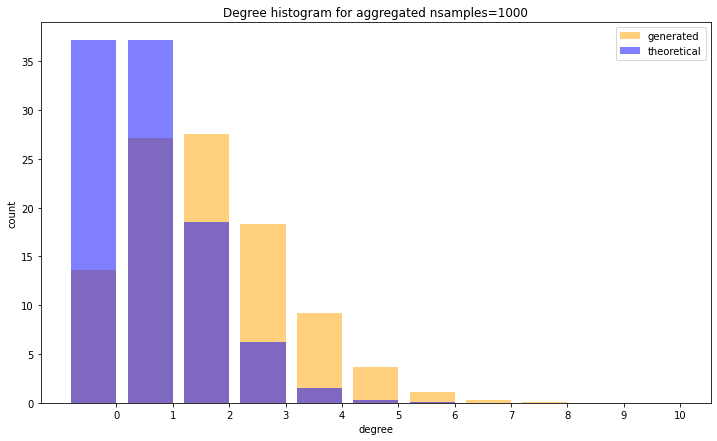

In [9]:
review_with_aggregation(N, p, 1000)

### $k = 3$

In [10]:
N = 101
k = 3
p = k * 1. / (N - 1)

Degree distribution: [(0, 4.0), (1, 13.0), (2, 23.0), (3, 16.0), (4, 18.0), (5, 14.0), (6, 7.0), (7, 3.0), (8, 3.0)]


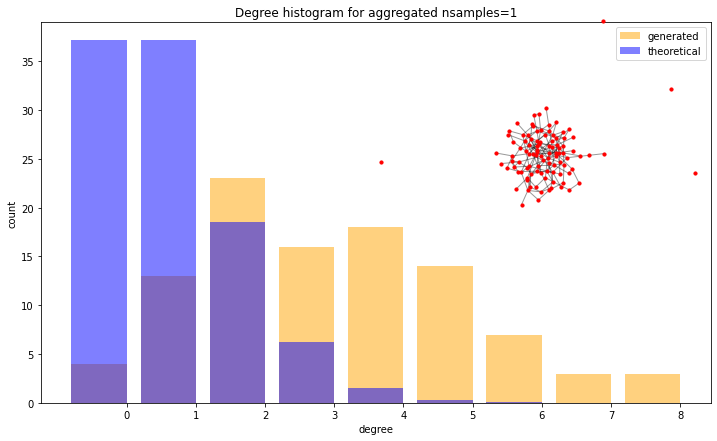

In [11]:
review_with_aggregation(N, p, 1)

Degree distribution: [(0, 4.88), (1, 15.05), (2, 23.46), (3, 22.48), (4, 16.64), (5, 10.23), (6, 4.92), (7, 2.19), (8, 0.82), (9, 0.2), (10, 0.09), (11, 0.03), (12, 0.01)]


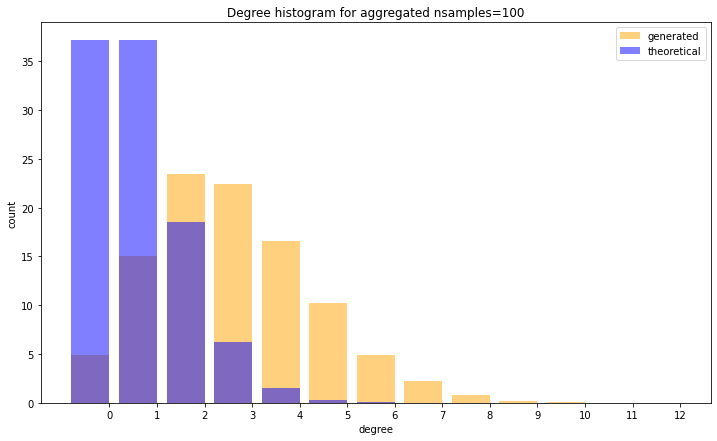

In [12]:
review_with_aggregation(N, p, 100)

Degree distribution: [(0, 4.874), (1, 14.902), (2, 22.773), (3, 23.006), (4, 17.23), (5, 10.022), (6, 5.085), (7, 2.034), (8, 0.739), (9, 0.249), (10, 0.062), (11, 0.021), (12, 0.003)]


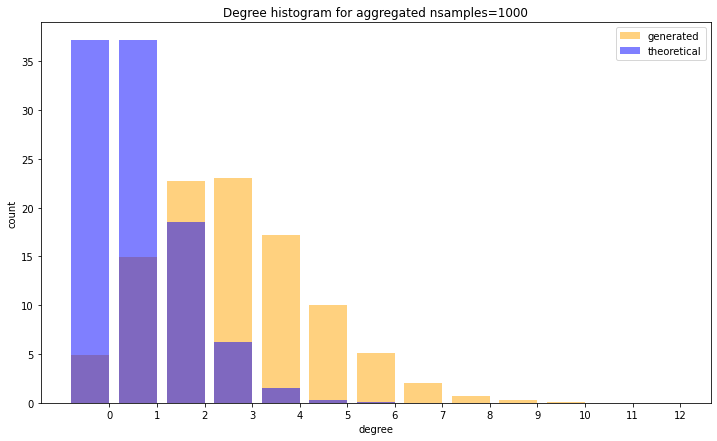

In [13]:
review_with_aggregation(N, p, 1000)

## Задание 2

Посмотрим на распределения связных компонент по размеру в зависимости от различных $k$.

$k = 0.5$

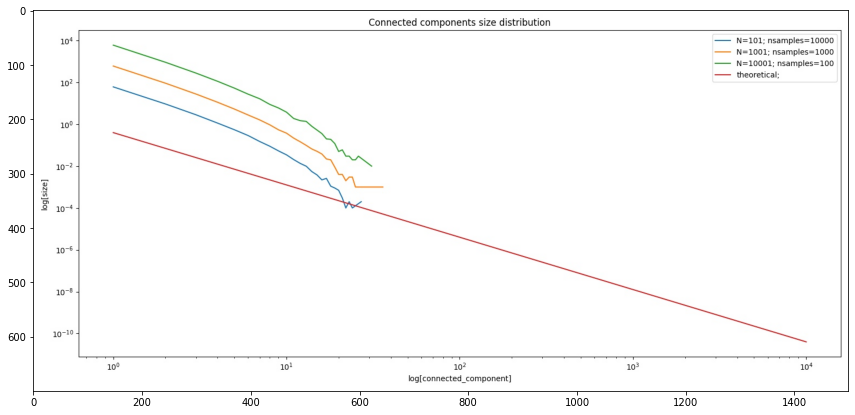

In [14]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.5.jpg")
plt.imshow(img)


$k = 0.9$

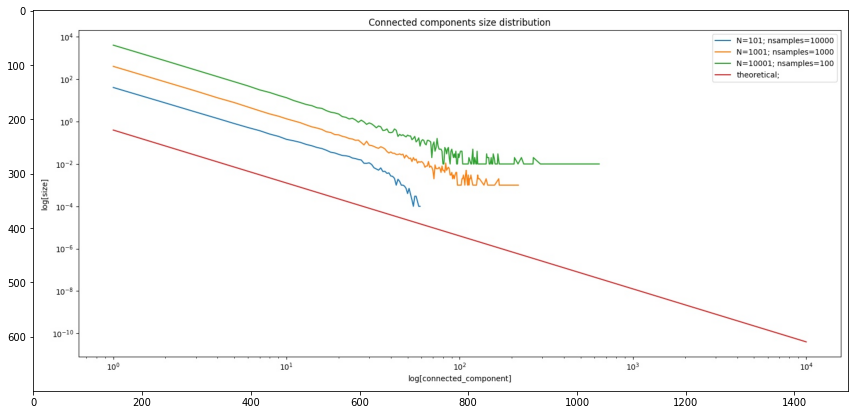

In [15]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.9.jpg")
plt.imshow(img)

$k = 0.98$

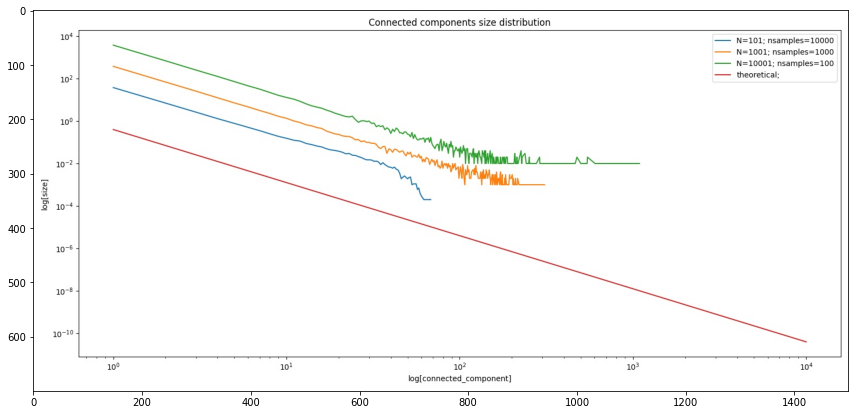

In [16]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=0.98.jpg")
plt.imshow(img)

$k = 1$

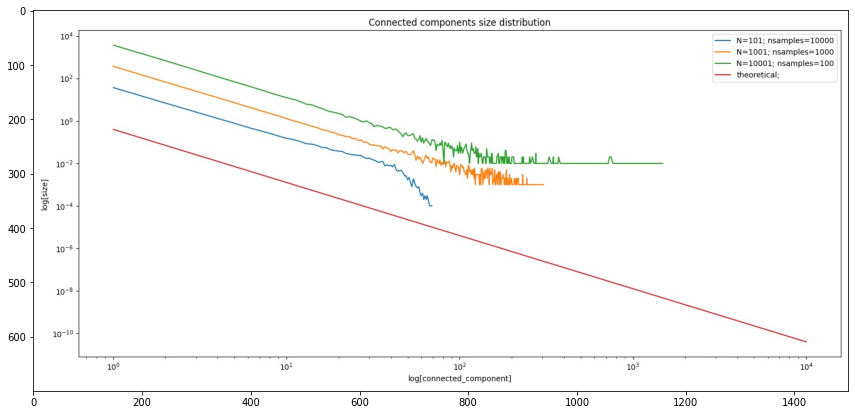

In [17]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.0.jpg")
plt.imshow(img)

$k = 1.02$

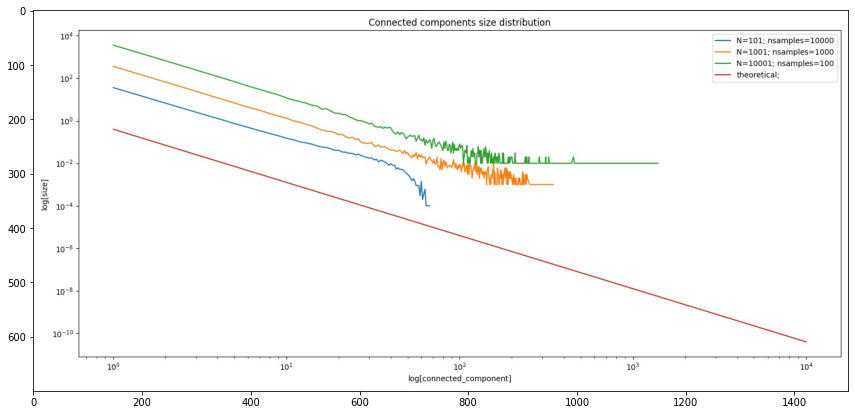

In [18]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.02.jpg")
plt.imshow(img)

$k = 1.1$

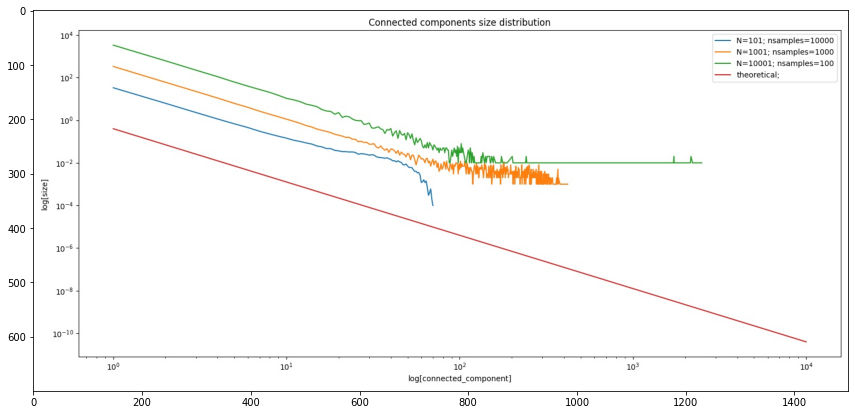

In [19]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=1.1.jpg")
plt.imshow(img)

$k = 2$

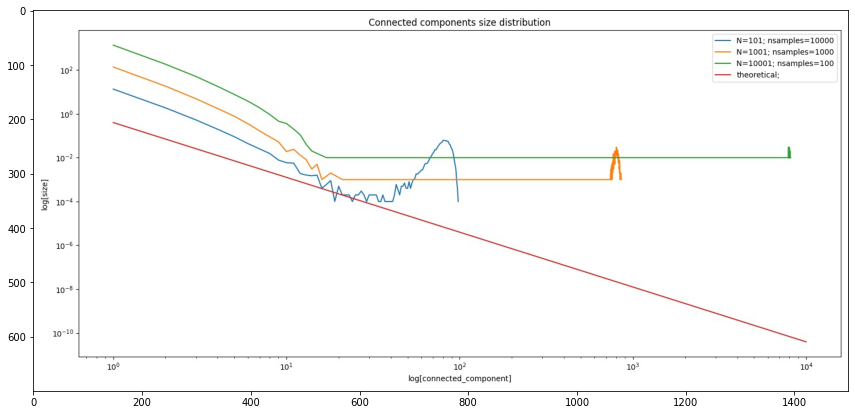

In [20]:
plt.figure(figsize=(15, 7))
img = imread("images/2_k=2.0.jpg")
plt.imshow(img)